# 01 Analysis Seoul CCTV

In [4]:
#한글폰트 깨짐 해결
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt

font_path = "C:\Windows\Fonts\Arial.ttf"
font= fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family = font)

#마이너스부호 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd

In [6]:
# pandas install -y pandas

In [7]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding = "utf-8")

In [8]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [10]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [11]:
CCTV_Seoul.rename(
    columns = {
        CCTV_Seoul.columns[0] : "구별"
    },inplace = True
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [12]:
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2016년"]) / CCTV_Seoul["2013년도 이전"] * 100
    
)
CCTV_Seoul.sort_values(by="최근증가율",ascending = False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,342.016807
22,종로구,1619,464,314,211,630,317.025862
12,마포구,980,314,118,169,379,295.222930


In [13]:
CCTV_Seoul.index

RangeIndex(start=0, stop=25, step=1)

In [14]:
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xls")

In [15]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


In [16]:
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xls", header=2,usecols="B,D,G,J,N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [17]:
pop_Seoul.rename( 
    columns = 
    { 
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "65세이상고령자"
    }, inplace = True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [18]:
pop_Seoul.index

RangeIndex(start=0, stop=26, step=1)

In [19]:
#pop_seoul.drop([0],axis=0,inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [20]:
pop_Seoul["구별"].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [21]:
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["65세이상고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.sort_values("구별",inplace=True)

In [22]:
pop_Seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '65세이상고령자', '외국인비율', '고령자비율'], dtype='object')

In [23]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,189.473684
1,강동구,1010,379,99,155,377,239.841689
2,강북구,831,369,120,138,204,147.967480
3,강서구,911,388,258,184,81,89.175258
4,관악구,2109,846,260,390,613,191.016548


In [24]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
23,강남구,561052,556164,4888,65060,0.871220,11.596073
25,강동구,440359,436223,4136,56161,0.939234,12.753458
9,강북구,328002,324479,3523,56530,1.074079,17.234651
16,강서구,608255,601691,6564,76032,1.079153,12.500021
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [25]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,189.473684,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,239.841689,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,147.967480,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,89.175258,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,191.016548,520929,503297,17632,70046,3.384722,13.446362


In [26]:
data_result.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율', '인구수',
       '한국인', '외국인', '65세이상고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [27]:
del data_result["2013년도 이전"]
del data_result["2014년"]

In [28]:
data_result.head()

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
0,강남구,3238,584,932,189.473684,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,239.841689,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,147.967480,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,184,81,89.175258,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,390,613,191.016548,520929,503297,17632,70046,3.384722,13.446362


In [29]:
data_result.drop(["2015년","2016년"],axis =1 ,inplace = True)

In [30]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
0,강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,239.841689,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,147.967480,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,89.175258,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,191.016548,520929,503297,17632,70046,3.384722,13.446362


In [31]:
data_result.set_index("구별",inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,239.841689,440359,436223,4136,56161,0.939234,12.753458
강북구,831,147.967480,328002,324479,3523,56530,1.074079,17.234651
강서구,911,89.175258,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,191.016548,520929,503297,17632,70046,3.384722,13.446362


## 상관계수
- corr()
- 상관계수가 0.2이상인 데이터를 비교


In [32]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율
소계,1.000000,-0.228034,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.228034,1.000000,-0.098503,-0.086829,-0.169948,-0.090820,-0.056300,0.152201
인구수,0.232555,-0.098503,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086829,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.169948,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
65세이상고령자,0.163905,-0.090820,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.056300,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.152201,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [33]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by = "CCTV비율",ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,317.025862,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,66.374269,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,185.956416,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,144.955490,253491,235154,18337,34170,7.233787,13.479769,0.531774


#한글폰트 깨짐 해결
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from matplotlib import rc

font_path = "C:\Windows\Fonts\Malgun.ttf"
font= fm.FontProperties(fname=font_path).get_name()
rc('font', family = font)

%matplotlib inline
#마이너스부호 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rc

#마이너스 깨짐해결
plt.rcParams['axes.unicode_minus'] = False

#window 맑은고딕
font_path = "C:\Windows\Fonts\Malgun.ttf"
font= fm.FontProperties(fname=font_path).get_name()
rc('font', family = font)

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

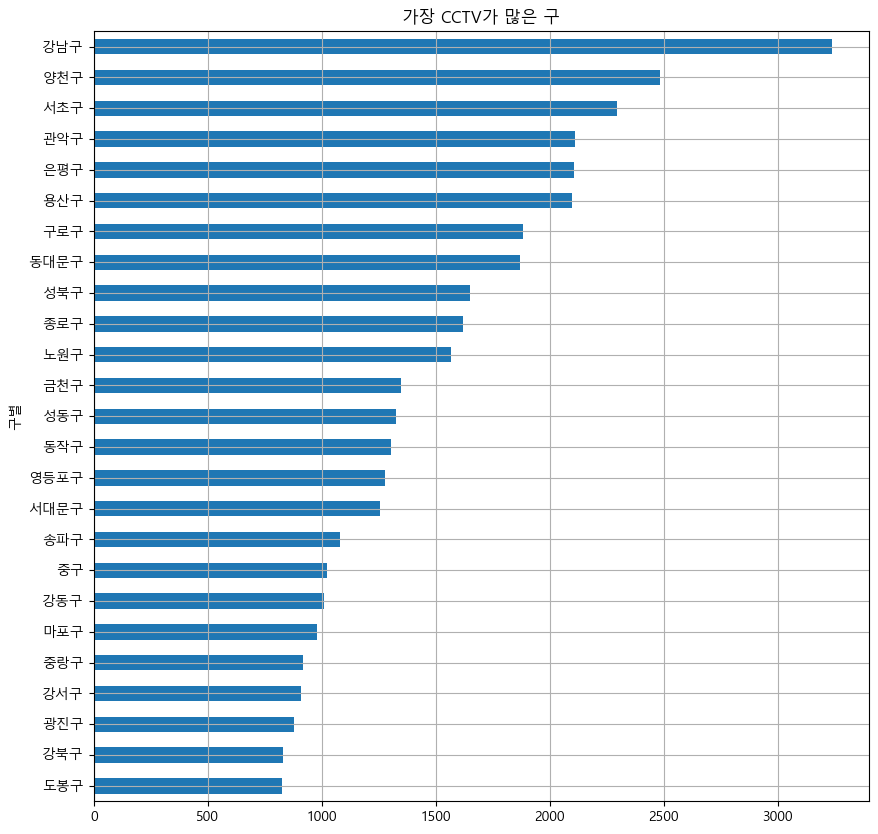

In [35]:
def drawgraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, figsize=(10,10), title = "가장 CCTV가 많은 구"
    );
drawgraph()

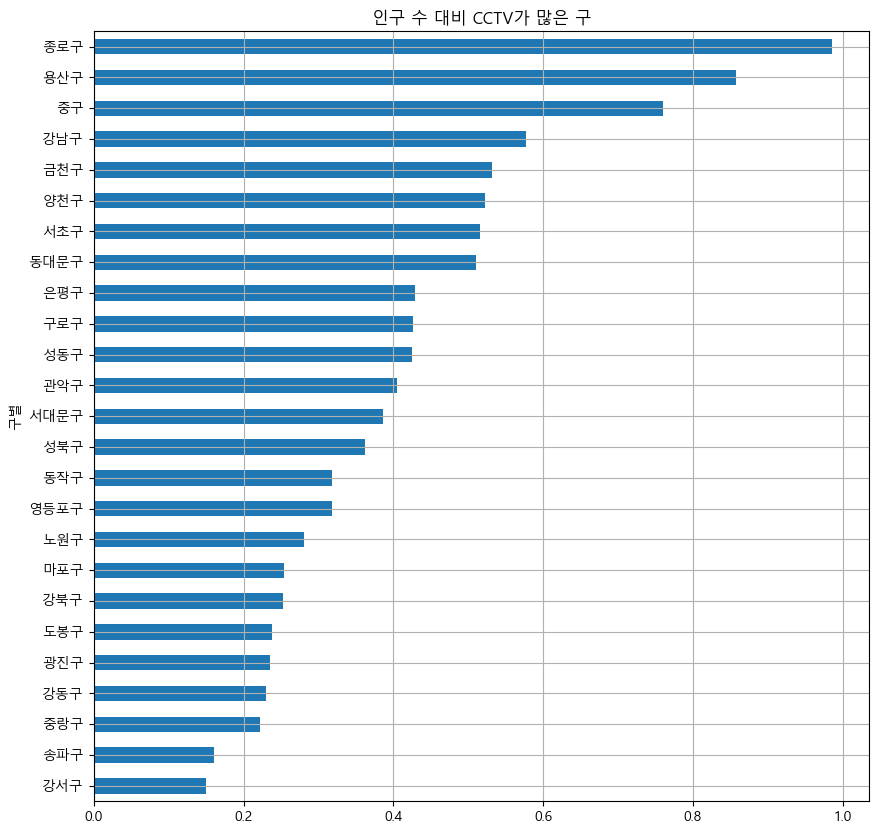

In [36]:
def drawgraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, figsize=(10,10), title = "인구 수 대비 CCTV가 많은 구"
    );
drawgraph()

In [37]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,239.841689,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,147.967480,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,89.175258,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,191.016548,520929,503297,17632,70046,3.384722,13.446362,0.404854


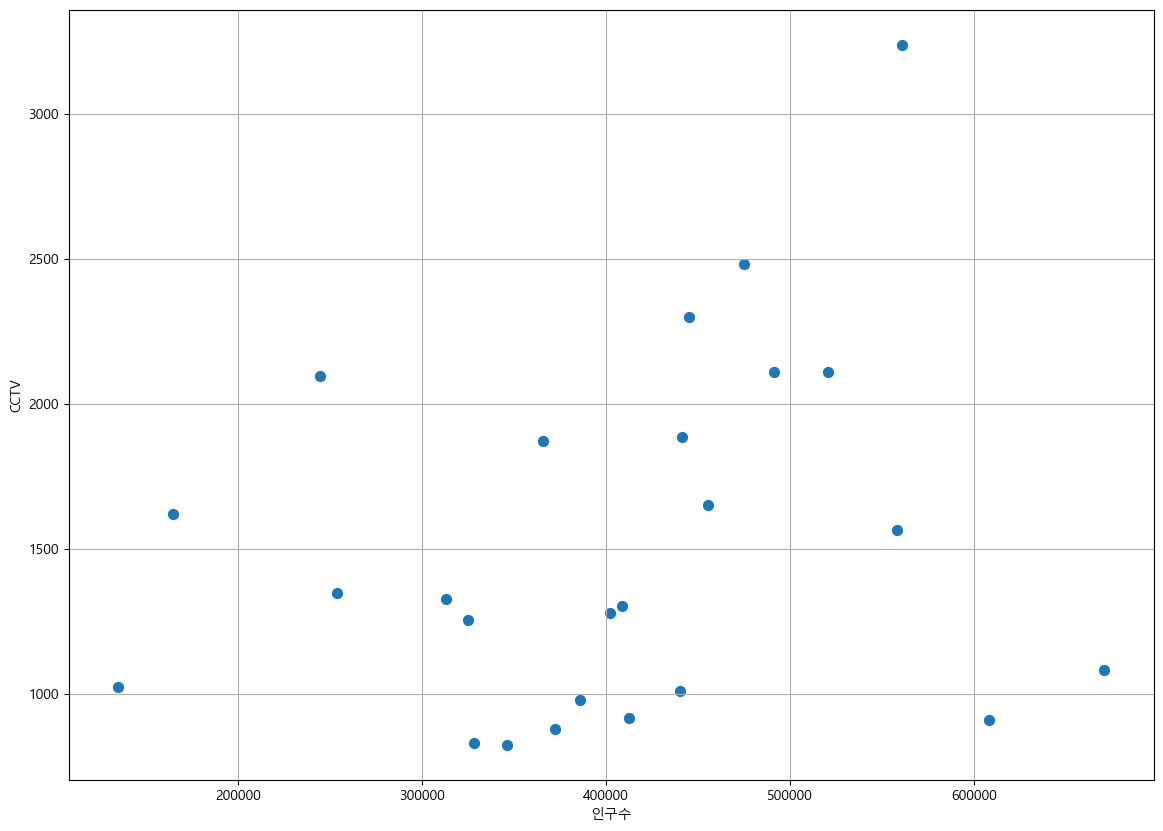

In [52]:
def drawgraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.grid(True)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show()
drawgraph()

### numpy를 이용한 1차직선 만들기
- np.polyfit() : 직선을 구성하기 위한 계수를 계산
- np.poly1d() : polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는기능

In [39]:
import numpy as np

In [41]:
fpl = np.polyfit(data_result["인구수"],data_result["소계"],1)
fpl

array([1.11155868e-03, 1.06515745e+03])

In [42]:
f1 = np.poly1d(fpl)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [47]:
f1(400000)

1509.7809252413338

- 인구가 40만인구에서 서울시의 전체 경향에 맞는 적당한 CCTV수는?

In [49]:
fx = np.linspace(100000,700000,100)

- 경향성을 그리기 위한 x 데이터 생성
- np.linspace(a,b,n) : a부터 b까지 c개의 동간격 데이터 생성

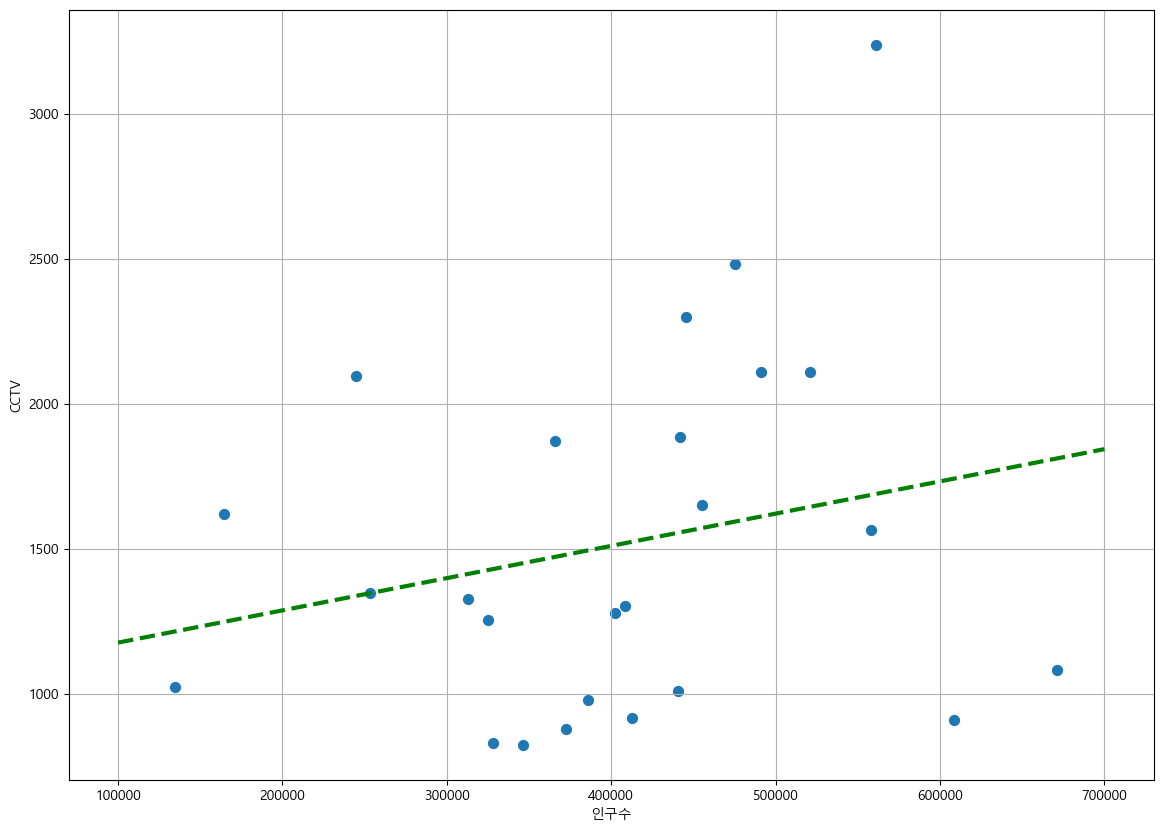

In [50]:
def drawgraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.plot(fx,f1(fx),ls="dashed", lw=3, color = "g")
    plt.grid(True)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show()
drawgraph()

### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향을 f1함수에 해당인구를 입력
- f1(data_rsult["인구수"]) = 경향에따른 CCTV수

In [54]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,239.841689,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,147.967480,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,89.175258,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,191.016548,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


- 오차와 차이가 많은 데이터와 적은 데이터 계산

In [56]:
df_sort_f = data_result.sort_values(by = "오차", ascending=False) #내림차순(오차가큰데이터)
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,189.473684,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,52.306023,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,66.374269,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,80.512091,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,106.678383,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [57]:
df_sort_t = data_result.sort_values(by = "오차", ascending=True) #오름차순(오차가적은데이터)
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,89.175258,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,187.901701,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,342.016807,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,77.603143,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,69.982548,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [64]:
from matplotlib.colors import ListedColormap

# colormap을 사용자정의로 세팅
color_step = ("#e74c3c","#2ecc71","#95a9a6","#2ecc71","#3498db","#3498db")

my_cmap = ListedColormap(color_step)


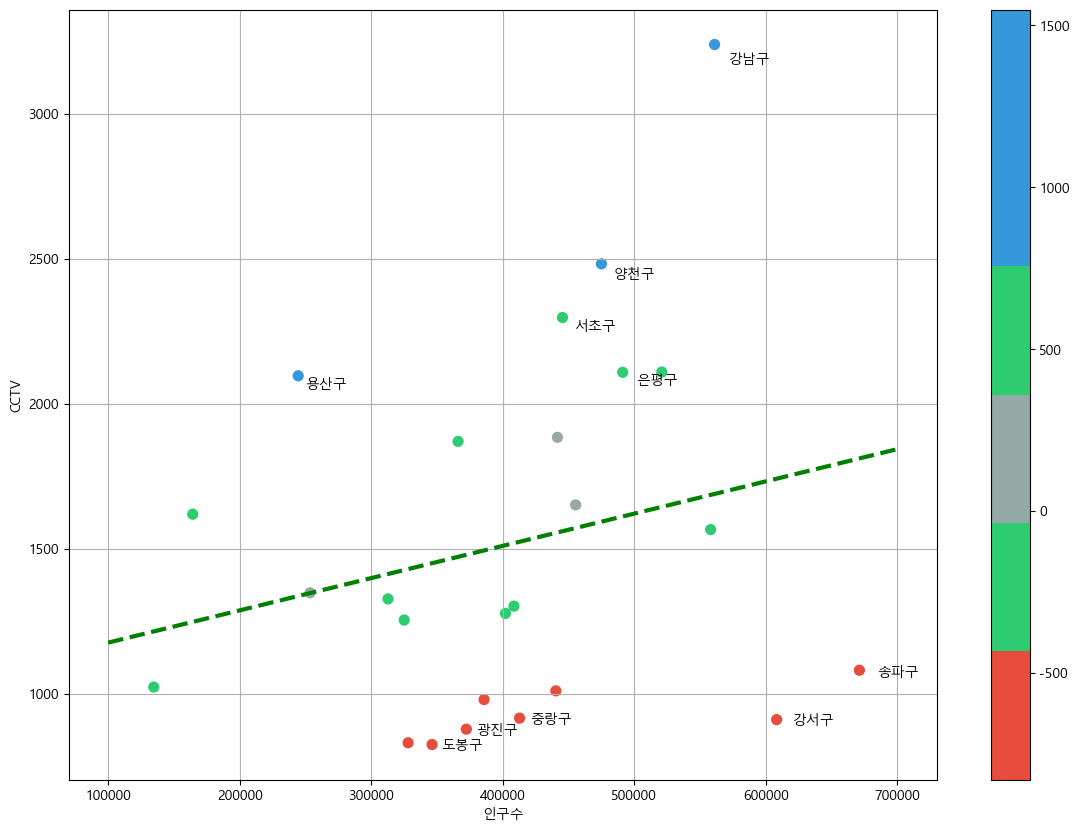

In [77]:
def drawgraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50,c=data_result["오차"],cmap = my_cmap)
    plt.plot(fx,f1(fx),ls="dashed", lw=3, color = "g")
    plt.grid(True)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")

    for i in range(5) :
        #상위
        plt.text(df_sort_f["인구수"][i]*1.02,df_sort_f["소계"][i]*0.98, df_sort_f.index[i],fontsize = 10)

        #하의
        plt.text(df_sort_t["인구수"][i]*1.02,df_sort_t["소계"][i]*0.98, df_sort_t.index[i],fontsize = 10)

    plt.colorbar()
    plt.show()
drawgraph()

In [80]:
data_result.to_csv("../data/01. CCTV_result.csv",encoding="utf-8")